Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Чтобы определиться с параметрами будущей модели, проведем разведывательный анализ данных и составим отчёт по его результатам. 

Описание датасета:
- 1 school — аббревиатура школы, в которой учится ученик
- 2 sex — пол ученика ('F' - женский, 'M' - мужской)
- 3 age — возраст ученика (от 15 до 22)
- 4 address — тип адреса ученика ('U' - городской, 'R' - за городом)
- 5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)
- 6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
- 7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
- 9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
- 11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
- 12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
- 13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
- 14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
- 15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
- 16 schoolsup — дополнительная образовательная поддержка (yes или no)
- 17 famsup — семейная образовательная поддержка (yes или no)
- 18 paid — дополнительные платные занятия по математике (yes или no)
- 19 activities — дополнительные внеучебные занятия (yes или no)
- 20 nursery — посещал детский сад (yes или no)
- 21 higher — хочет получить высшее образование (yes или no)
- 22 internet — наличие интернета дома (yes или no)
- 23 romantic — в романтических отношениях (yes или no)
- 24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
- 25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
- 26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
- 27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
- 28 absences — количество пропущенных занятий
- 29 score — баллы по госэкзамену по математике

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('stud_math.csv')
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### В данных есть NaN значения, заменим их на None в столбцах типа object

In [4]:
# Функция заменяет пропущенные значения на None в object

def empty_value_object(x):    
    if str(x).strip() == '':
        return None
    elif str(x) == 'nan':
        return None
    else:
        return x

In [5]:
#Список столбцов типа object
columns_object = []
for column in data.select_dtypes(include=['object']):
    columns_object.append(column)

#Список столбцов типа float, int
columns_float = []
for column_float in data.select_dtypes(include=['float64', 'int64']):
    columns_float.append(column_float)

#Замена NaN на None в object
for col in columns_object:
    data[col] = data[col].apply(empty_value_object)

In [6]:
data.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


### Посмотрим на числовые столбцы: нет ли ошибок в данных, устраним выбросы.

In [7]:
for col_float in columns_float:
    print(data[col_float].unique()) 
    print(data[col_float].value_counts())

[18 17 15 16 19 22 20 21]
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64
[ 4.  1.  3.  2. nan  0.]
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
[ 4.  1.  2.  3. 40. nan  0.]
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64
[ 2.  1.  3. nan  4.]
1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64
[ 2.  3.  1. nan  4.]
2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64
[ 0.  3. nan  2.  1.]
0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64
[ -6.  -9.  -3.  nan -12.]
-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64
[ 4.  5.  3. nan -1.  2.  1.]
 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64
[ 3.  2.  4.  1.  5. nan]
3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtyp

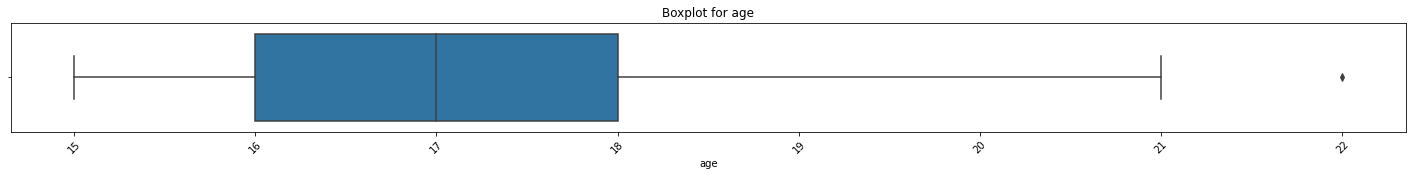

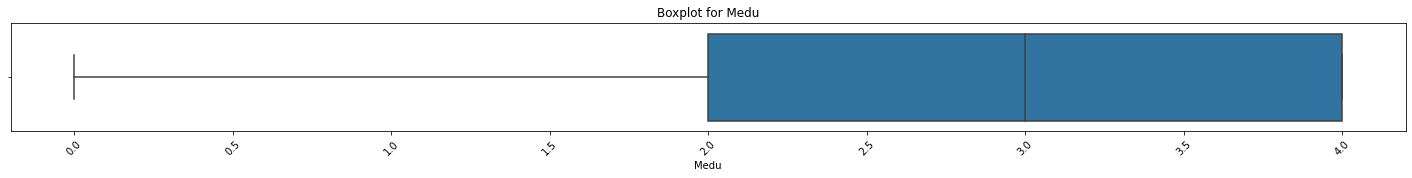

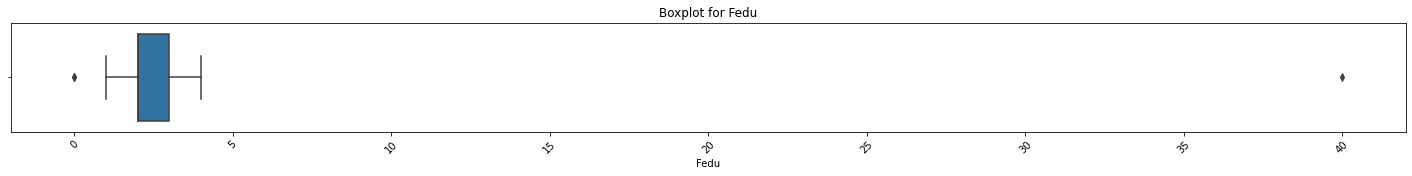

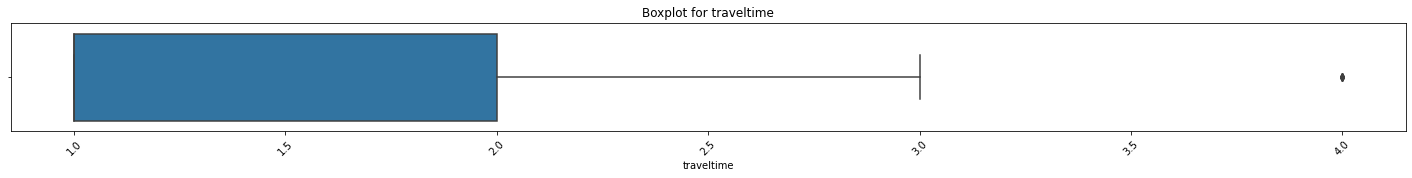

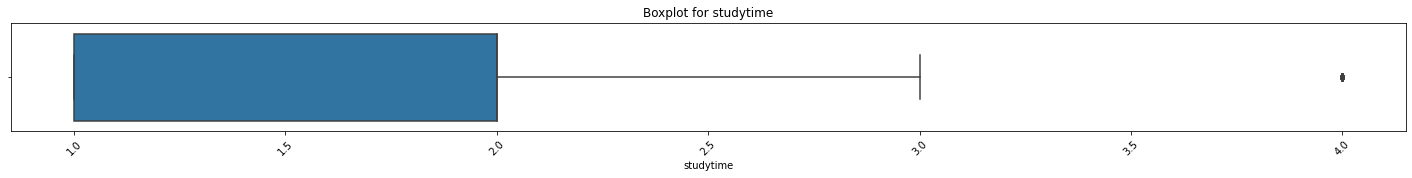

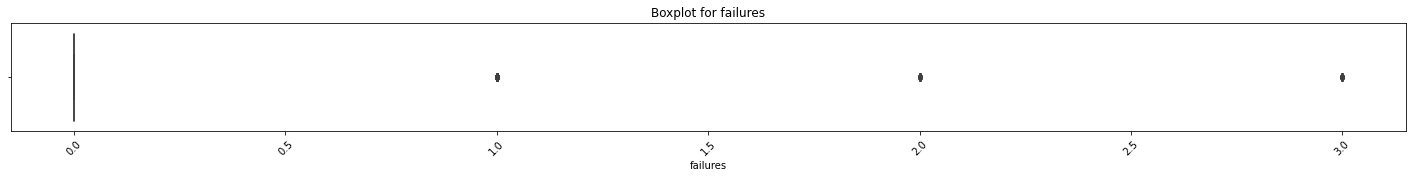

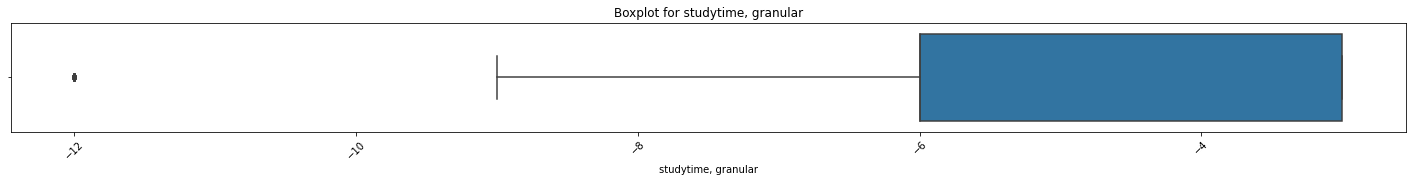

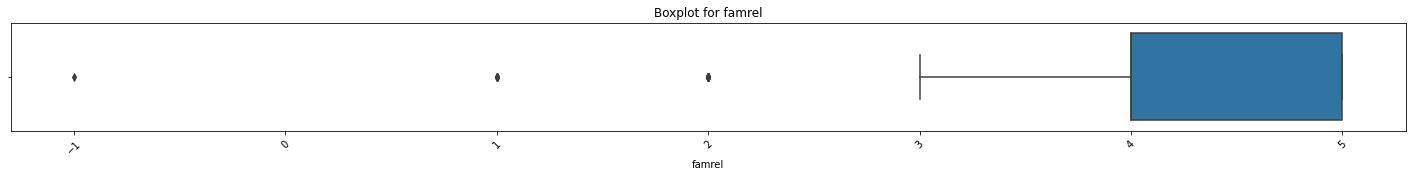

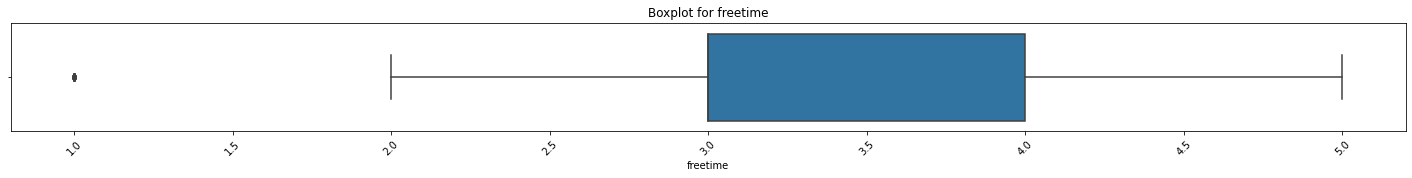

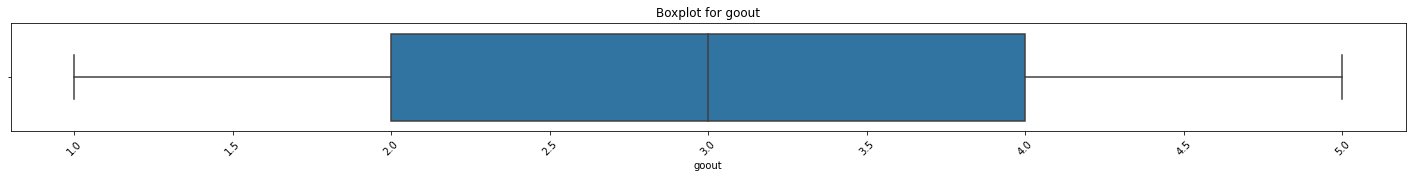

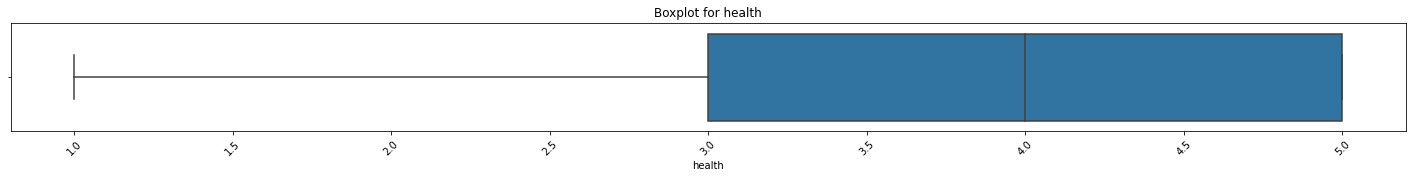

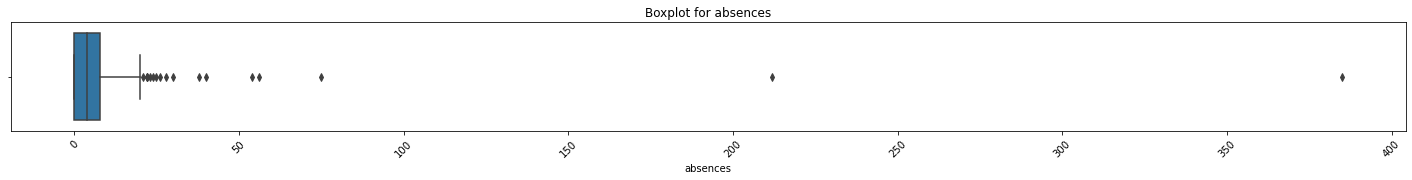

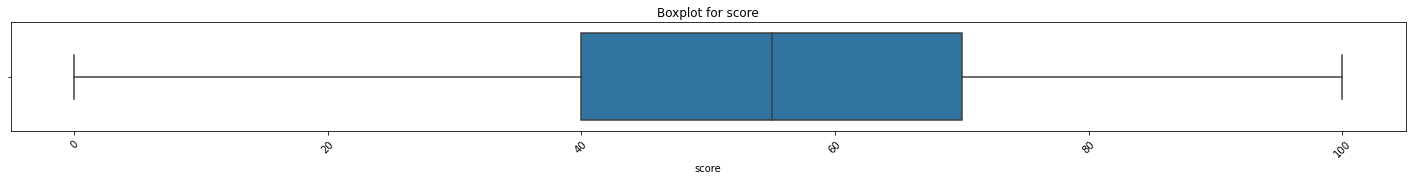

In [8]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (25, 2))
    sns.boxplot(x=column, data=data, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in columns_float:
    get_boxplot(col)

## age

In [9]:
data = data[data['age'] <= 19]

## Medu, Fedu

In [10]:
data[data['Fedu']==40.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,None,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


Судя по остальной информации, это опечатка. Заменим 40 на 4.

In [11]:
data['Fedu'].replace(40.0, 4, inplace=True)

Посмотрим на корреляцию столбцов Fedu и Medu.

In [12]:
data['Fedu'].corr(data['Medu'])

0.629090663062503

Она достаточно высока, значит можно заменить пропущенные значения в столбце Medu на значения из столбца Fedu, т.к. значений Medu больше. Fedu удалим.

In [13]:
data.Medu = data[['Medu','Fedu']].apply(lambda x: x[1] if pd.isna(x[0]) else x[0],axis=1)

In [14]:
data.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    390 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [15]:
data = data.drop(['Fedu'], axis=1)

## traveltime

In [16]:
data = data[data['traveltime'] <= 3]

## studytime; studytime, granular

In [17]:
data = data[data['studytime'] <= 3]

Есть два столбца с почти одинаковым названием. Посмотрим на их корреляцию.

In [18]:
data['studytime'].corr(data['studytime, granular'])

-0.9999999999999993

Корреляция почти -1, значит один из столбцов можно удалить. 

In [19]:
data = data.drop(['studytime, granular'], axis=1)

## failures

In [20]:
data = data[data['failures'] <= 1]

## famrel

In [21]:
data = data[data['famrel'] >= 3]

## freetime

In [22]:
data = data[data['freetime'] >= 2]

## absences

In [23]:
data=data.loc[data.loc[:, 'absences'].isin(data.loc[:, 'absences'].value_counts().index[:10])]

In [24]:
data['absences'].value_counts()

0.0     63
4.0     38
2.0     36
6.0     15
8.0     12
10.0     9
12.0     7
3.0      6
14.0     5
16.0     5
Name: absences, dtype: int64

## score

<AxesSubplot:>

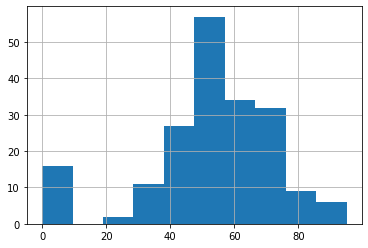

In [25]:
data['score'].hist()

Нулевых значений слишком много - это явно ошибка, удалим эти строки.

In [26]:
data = data[data['score'] > 0]

### Посмотрим как наши данные выглядят сейчас

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 393
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      178 non-null    object 
 1   sex         178 non-null    object 
 2   age         178 non-null    int64  
 3   address     170 non-null    object 
 4   famsize     170 non-null    object 
 5   Pstatus     162 non-null    object 
 6   Medu        178 non-null    float64
 7   Mjob        170 non-null    object 
 8   Fjob        166 non-null    object 
 9   reason      169 non-null    object 
 10  guardian    161 non-null    object 
 11  traveltime  178 non-null    float64
 12  studytime   178 non-null    float64
 13  failures    178 non-null    float64
 14  schoolsup   175 non-null    object 
 15  famsup      160 non-null    object 
 16  paid        158 non-null    object 
 17  activities  170 non-null    object 
 18  nursery     169 non-null    object 
 19  higher      171 non-null    o

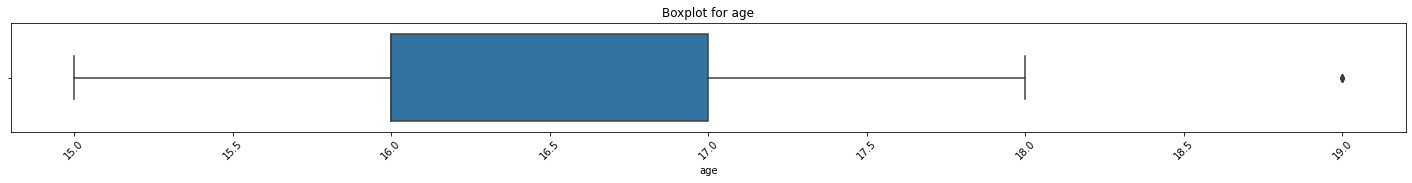

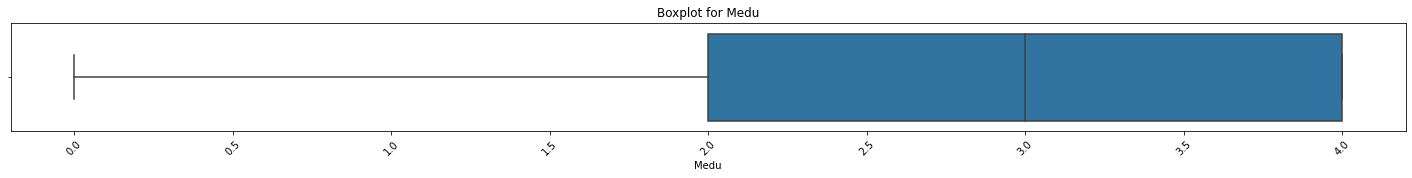

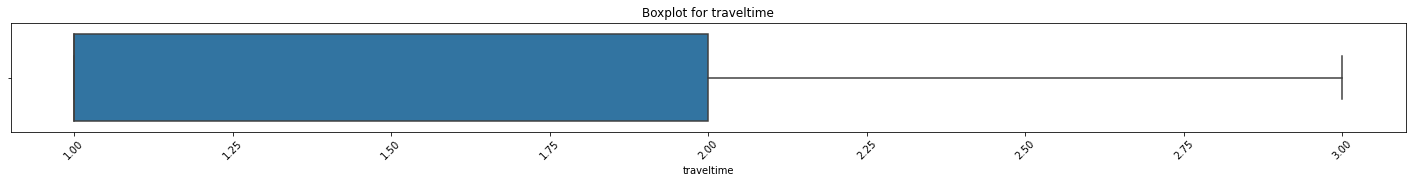

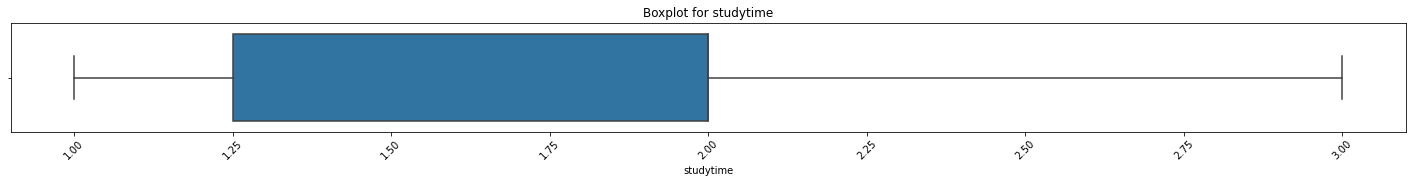

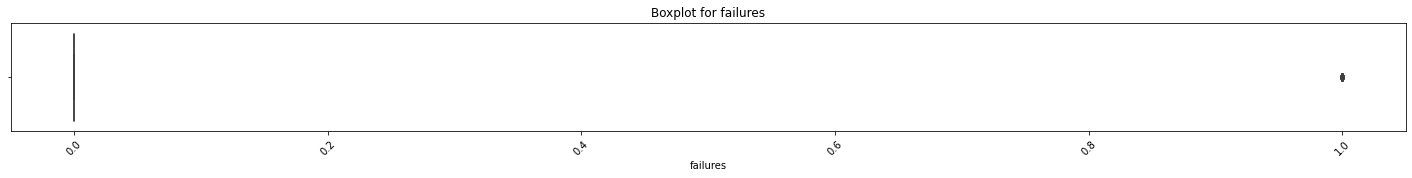

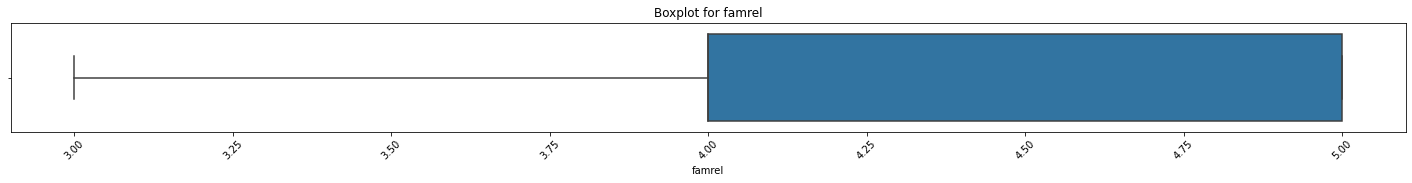

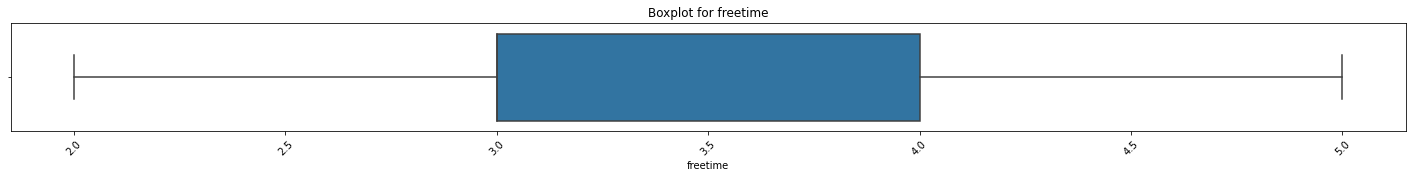

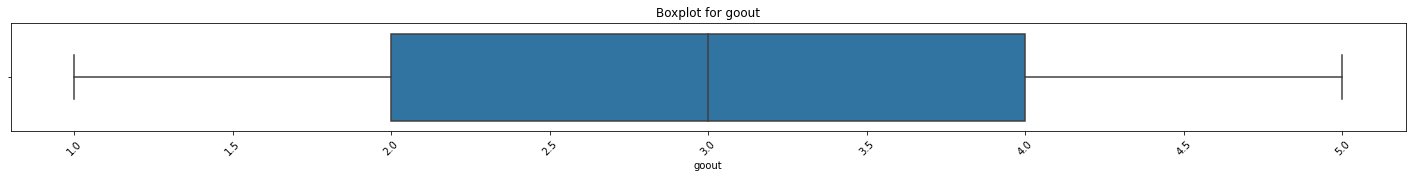

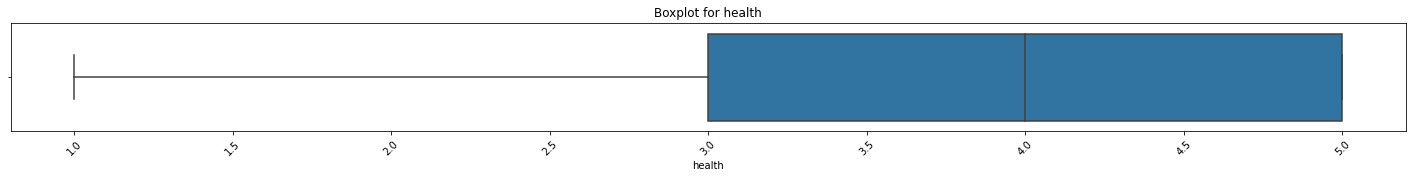

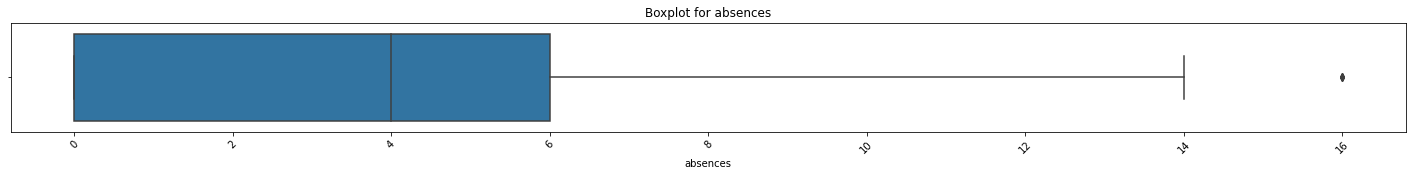

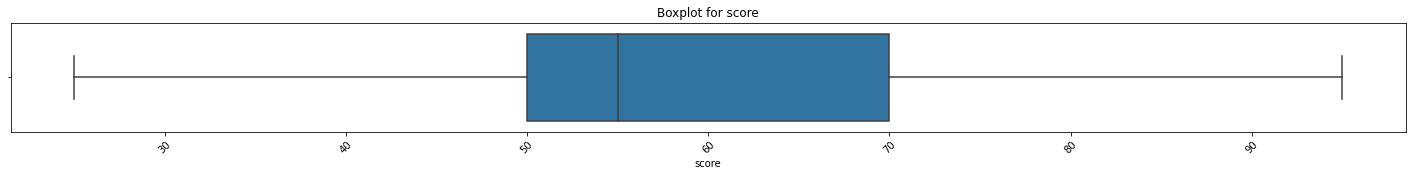

In [28]:
columns_float = []
for column_float in data.select_dtypes(include=['float64', 'int64']):
    columns_float.append(column_float)
    
    
for col in columns_float:
    get_boxplot(col)

### Уже лучше, теперь посмотрим на номинативные переменные

In [29]:
for col in columns_object:
    print(data[col].unique())
    print(data[col].value_counts().sort_values(ascending=False))

['GP' 'MS']
GP    158
MS     20
Name: school, dtype: int64
['F' 'M']
F    91
M    87
Name: sex, dtype: int64
['U' None 'R']
U    140
R     30
Name: address, dtype: int64
[None 'GT3' 'LE3']
GT3    115
LE3     55
Name: famsize, dtype: int64
['A' None 'T']
T    147
A     15
Name: Pstatus, dtype: int64
['at_home' 'health' 'other' 'services' 'teacher' None]
other       60
services    43
teacher     28
at_home     24
health      15
Name: Mjob, dtype: int64
['teacher' 'other' None 'health' 'services' 'at_home']
other       86
services    49
teacher     15
at_home      9
health       7
Name: Fjob, dtype: int64
['course' 'home' 'reputation' None 'other']
course        61
reputation    47
home          45
other         16
Name: reason, dtype: int64
['mother' 'father' 'other' None]
mother    111
father     42
other       8
Name: guardian, dtype: int64
['yes' 'no' None]
no     150
yes     25
Name: schoolsup, dtype: int64
['no' 'yes' None]
yes    98
no     62
Name: famsup, dtype: int64
['no' 'yes' 

## По уникальным значениям относительно ок, кроме того, что некоторых данных маловато. Посмотрим на степень влияния на итоговую оценку и уберем те данные, которые на нее не влияют.

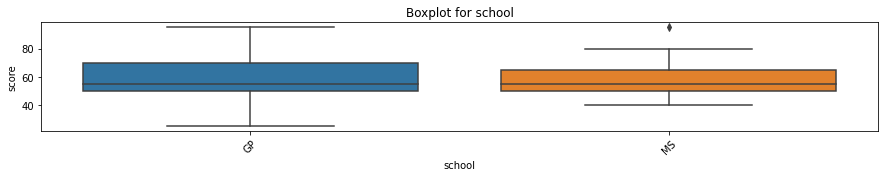

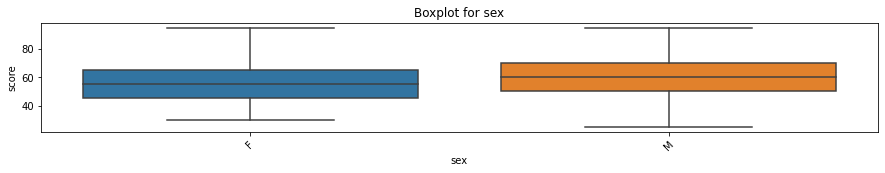

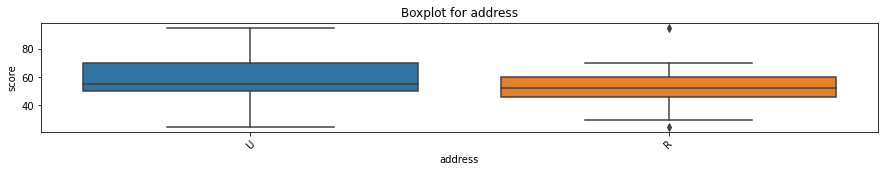

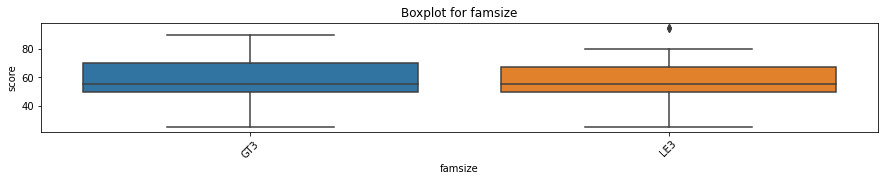

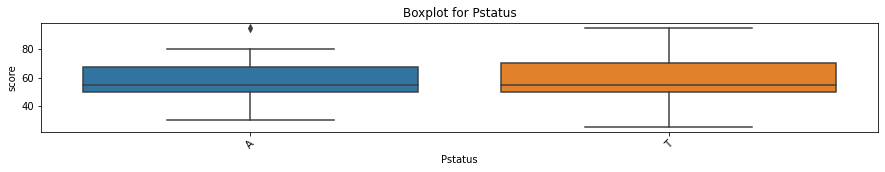

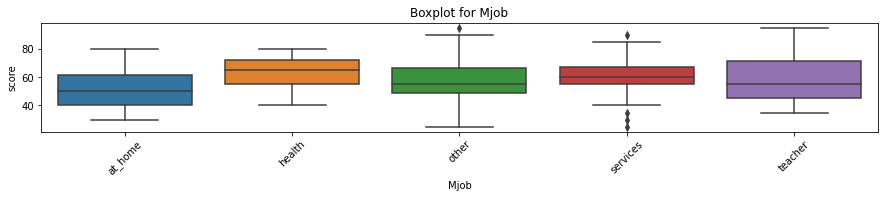

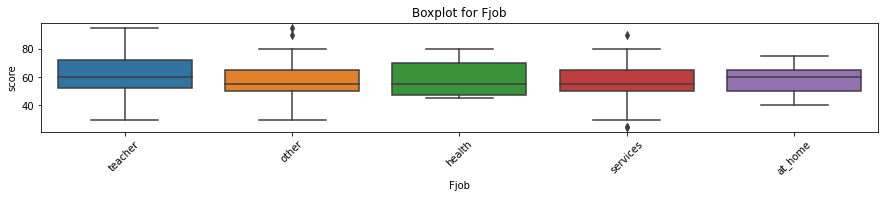

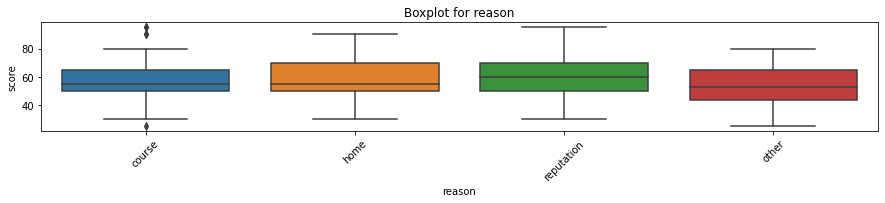

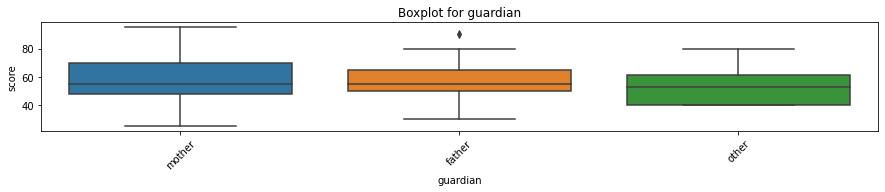

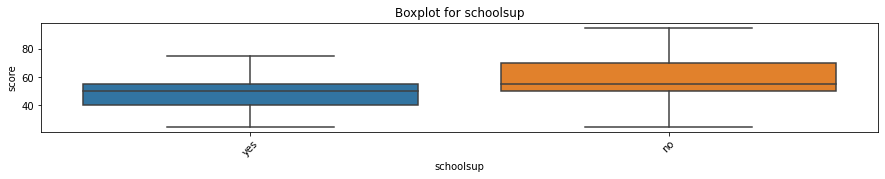

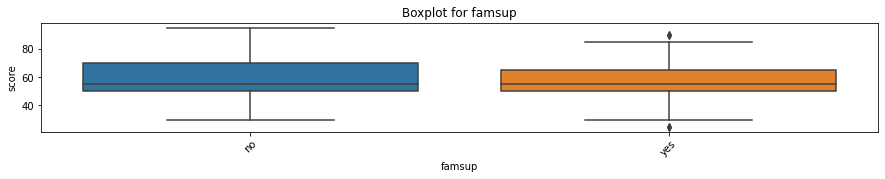

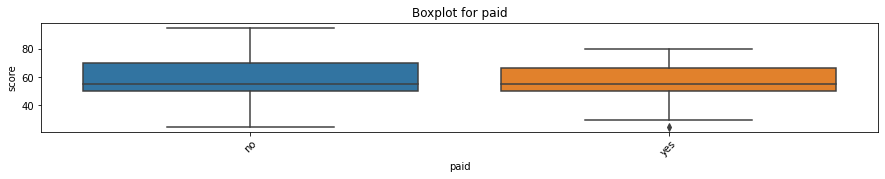

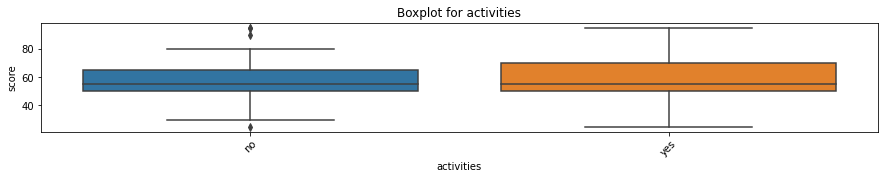

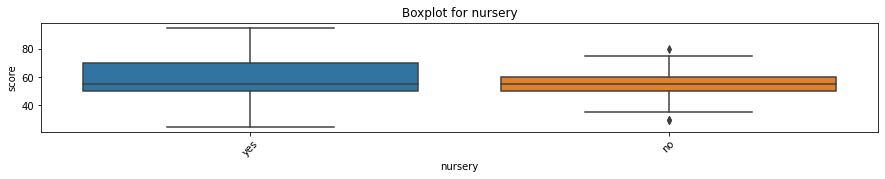

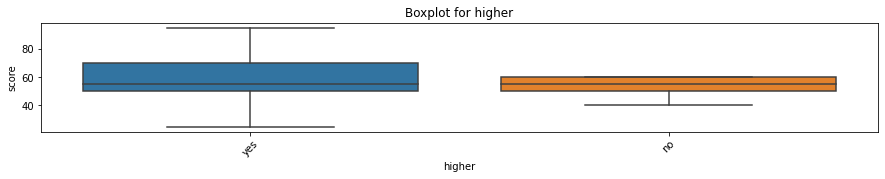

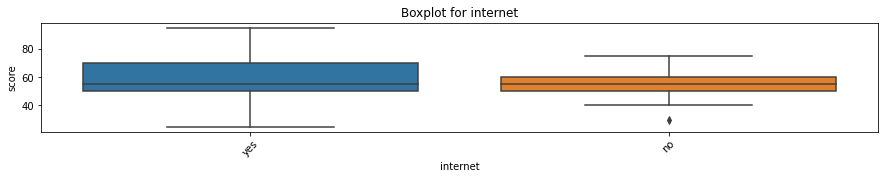

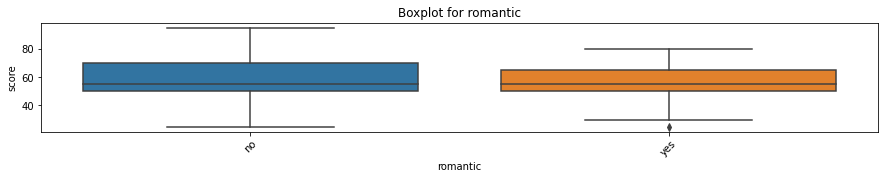

In [31]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (15, 2))
    sns.boxplot(x=column, y='score', data=data, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()
    
for col in columns_object:
    get_boxplot(col) 

<AxesSubplot:xlabel='score', ylabel='Density'>

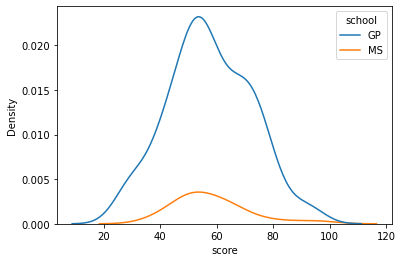

In [32]:
sns.kdeplot(x='score', hue='school', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

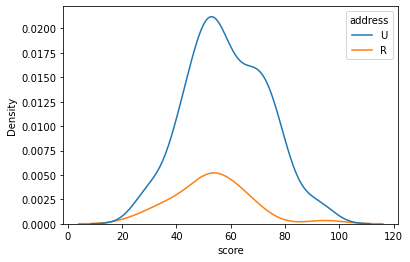

In [33]:
sns.kdeplot(x='score', hue='address', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

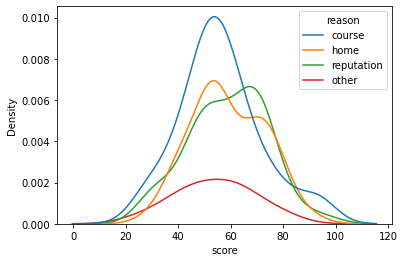

In [34]:
sns.kdeplot(x='score', hue='reason', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

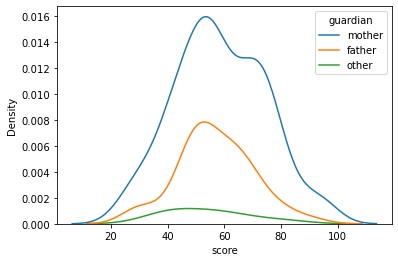

In [35]:
sns.kdeplot(x='score', hue='guardian', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

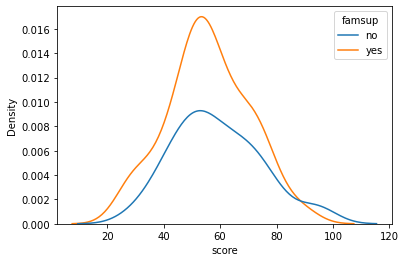

In [36]:
sns.kdeplot(x='score', hue='famsup', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

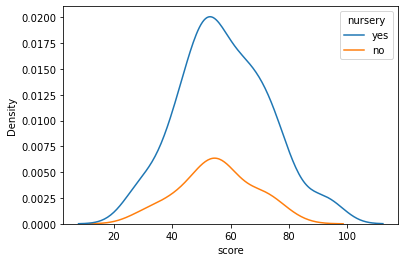

In [37]:
sns.kdeplot(x='score', hue='nursery', data=data)

<AxesSubplot:xlabel='score', ylabel='Density'>

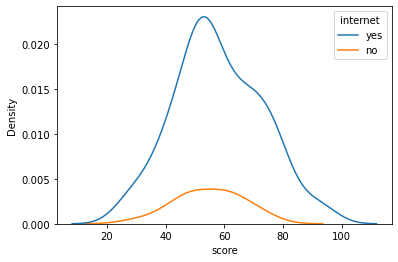

In [38]:
sns.kdeplot(x='score', hue='internet', data=data)

In [ ]:
sns.kdeplot(x='score', hue='romantic', data=data)

### Если где-то были сомнения, строила доп. график для понимания и оценивала количество уникальных значений.

### Не влияют: school, sex, address, famsize, Pstatus, guardian, famsup, paid, activities, nursery, higher, internet, romantic
    
### Влияют: Mjob, Fjob, reason, schoolsup

### Посмотрим на корреляцию

In [30]:
data.corr()

,age,Medu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.147523,0.210187,0.089170,0.250920,-0.049007,-0.088104,0.174709,-0.037870,0.159317,-0.189760
Medu,-0.147523,1.000000,-0.114088,0.086308,-0.139818,0.110868,0.031742,0.037111,-0.001494,0.134379,0.173541
traveltime,0.210187,-0.114088,1.000000,-0.123948,0.020456,0.008476,0.012516,-0.062022,-0.006664,-0.059382,-0.001339
studytime,0.089170,0.086308,-0.123948,1.000000,-0.096324,0.103180,-0.060172,0.037884,-0.056537,-0.053976,0.048673
failures,0.250920,-0.139818,0.020456,-0.096324,1.000000,0.041353,0.246043,0.173949,0.246559,0.203242,-0.164805
famrel,-0.049007,0.110868,0.008476,0.103180,0.041353,1.000000,0.128888,-0.004673,0.049428,-0.021683,0.096905
freetime,-0.088104,0.031742,0.012516,-0.060172,0.246043,0.128888,1.000000,0.177704,0.019397,0.041706,0.029630
goout,0.174709,0.037111,-0.062022,0.037884,0.173949,-0.004673,0.177704,1.000000,0.004245,0.108093,-0.250545
health,-0.037870,-0.001494,-0.006664,-0.056537,0.246559,0.049428,0.019397,0.004245,1.000000,0.043708,0.040675
absences,0.159317,0.134379,-0.059382,-0.053976,0.203242,-0.021683,0.041706,0.108093,0.043708,1.000000,-0.170400


In [40]:
data.corr()['score'].sort_values()

goout        -0.250545
age          -0.189760
absences     -0.170400
failures     -0.164805
traveltime   -0.001339
freetime      0.029630
health        0.040675
studytime     0.048673
famrel        0.096905
Medu          0.173541
score         1.000000
Name: score, dtype: float64

<AxesSubplot:>

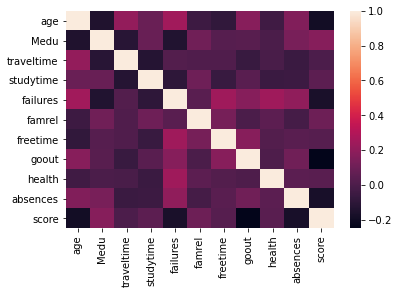

In [41]:
sns.heatmap(data.corr())

In [42]:
data_for_model = data.loc[:, ['Medu', 'famrel', 'studytime', 'health', 'freetime', 'failures', 'absences', 'age', 
                              'goout', 'Mjob', 'Fjob', 'reason', 'schoolsup']]
data_for_model.head(10)

,Medu,famrel,studytime,health,freetime,failures,absences,age,goout,Mjob,Fjob,reason,schoolsup
0,4.0,4.0,2.0,3.0,3.0,0.0,6.0,18,4.0,at_home,teacher,course,yes
1,1.0,5.0,2.0,3.0,3.0,0.0,4.0,17,3.0,at_home,other,course,no
3,4.0,3.0,3.0,5.0,2.0,0.0,2.0,15,2.0,health,None,home,no
4,3.0,4.0,2.0,5.0,3.0,0.0,4.0,16,2.0,other,other,home,no
5,4.0,5.0,2.0,5.0,4.0,0.0,10.0,16,2.0,services,other,reputation,no
6,2.0,4.0,2.0,3.0,4.0,0.0,0.0,16,4.0,other,other,home,no
9,3.0,5.0,2.0,5.0,5.0,0.0,0.0,15,1.0,other,other,home,no
10,4.0,3.0,2.0,2.0,3.0,0.0,0.0,15,3.0,teacher,health,reputation,no
11,2.0,5.0,3.0,4.0,2.0,0.0,4.0,15,2.0,services,other,reputation,no
13,4.0,5.0,2.0,3.0,4.0,0.0,2.0,15,3.0,teacher,other,course,no


Выводы: 

- В данных много пустых значений и выбросов, например, данных об учениках старше 19 лет всего 5 строк.
- Единственное, что удивляет - сильная отрицательная корреляция возраста и итоговой оценки. Дело либо в малом количестве данных о более старших учениках, либо в простых бытовых вещах (более старшие начинают работать, меньше уделяют времени учебе и т.д., т.к. есть положительная корреляция возраста и количества пропусков, внеучебных неудач и времени пути до школы).
- Сильнее всего влияют: общение с друзьями, количество пропущенных занятий, образование родителей, внеучебные неудачи.